In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [76]:
df = pd.read_csv('alzheimers_disease_data.csv')

In [77]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [79]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [80]:
for column in df.columns:
    print(df[column].head(3))
    print('\n')

0    4751
1    4752
2    4753
Name: PatientID, dtype: int64


0    73
1    89
2    73
Name: Age, dtype: int64


0    0
1    0
2    0
Name: Gender, dtype: int64


0    0
1    0
2    3
Name: Ethnicity, dtype: int64


0    2
1    0
2    1
Name: EducationLevel, dtype: int64


0    22.927749
1    26.827681
2    17.795882
Name: BMI, dtype: float64


0    0
1    0
2    0
Name: Smoking, dtype: int64


0    13.297218
1     4.542524
2    19.555085
Name: AlcoholConsumption, dtype: float64


0    6.327112
1    7.619885
2    7.844988
Name: PhysicalActivity, dtype: float64


0    1.347214
1    0.518767
2    1.826335
Name: DietQuality, dtype: float64


0    9.025679
1    7.151293
2    9.673574
Name: SleepQuality, dtype: float64


0    0
1    0
2    1
Name: FamilyHistoryAlzheimers, dtype: int64


0    0
1    0
2    0
Name: CardiovascularDisease, dtype: int64


0    1
1    0
2    0
Name: Diabetes, dtype: int64


0    1
1    0
2    0
Name: Depression, dtype: int64


0    0
1    0
2    0
Name: HeadInjury

In [81]:
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

## EDA

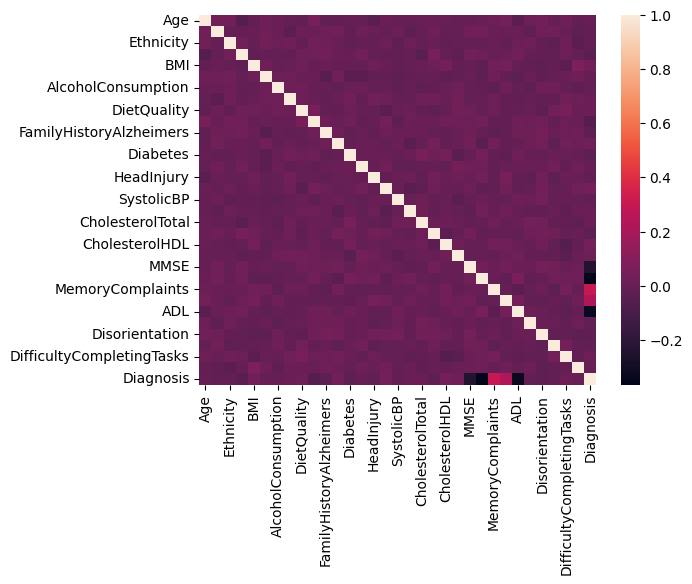

In [82]:
corr = df.corr()
plot = sns.heatmap(corr, annot=False)

In [83]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

## Train Test Split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling the data

In [85]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Testing models

In [86]:
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)
model.score(np.array(X_test_scaled), y_test)

0.8302325581395349

In [87]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
model.score(np.array(X_test_scaled), y_test)

0.9209302325581395

In [88]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_scaled, y_train)
model.score(np.array(X_test_scaled), y_test)

0.9511627906976744

In [89]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)
model.score(np.array(X_test_scaled), y_test)

0.813953488372093

In [90]:
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
model.score(np.array(X_test_scaled), y_test)

0.9604651162790697